¿Cuál es la pregunta de investigación del artículo?

El autor busca analizar, explicar y modelar una política monetaria no convencional para poder estudiar cómo los efectos de la crisis del 2008-2009 de Estados Unidos pueden ser contrarrestados. Asimismo, recalca la importancia de estas políticas no convencionales en su aplicación en la economía mundial.

¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?

Se encontraron dos fortalezas. En primer lugar, se introduce el contexto de la crisis en Estados Unidos, dando así una posibilidad a tener mayor comprensión y conocimientos previos para entender el planteamiento de su pregunta de investigación. Asimismo, apoyando al punto anteriormente mencionado sobre su apoyo al lector al brindar contexto histórico-económico y político del país, nos ofrece también una descriptiva explicación sobre los gráficos utilizados. Por otra parte, respecto a las debilidades, se observa que no hubo una comparación explícita entre los modelos antiguos y los que tienen cambios, por lo tanto, no se pueden comprobar las diferencias como tal; de igual forma, sería una buena idea que el autor pueda evidenciar cómo funcionaría el modelo en otros países que no sean Estados Unidos para así comprobar el nivel de efectividad.

¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? (Si no puede encontrar ninguna contribución, pregúntese por qué el editor y los árbitros decidieron publicar el artículo).

Mendoza avanza el conocimiento sobre la pregunta de investigación mediante el agregado de la oferta y demanda, lo cual nos permite comprender los antiguos y nuevos modelos de las políticas monetarias no convencionales.
¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros articulos relacionados)

PARTE CÓDIGO:

    - CLAUDIA CABREL
    - AISHA MARTÍNEZ

1. A partir del siguiente sistema de ecuaciones que representan el modelo IS-LM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

1.1 Encuentre las ecuaciones de Ingreso  y tasa de interes  de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).

La función de la curva IS:
    
$$ r = \frac{β_0}{h} - \frac{β_1}{h}Y $$

$$ rh = β_0 - β_1Y $$
      
$$ β_1Y = β_0 - rh $$
    
$$ Y = \frac{β_0 - rh}{β_1} $$

    
    
    

En ese sentido:

$β_0 = C_0 + I_0 + G_0 + X_0$

$β_1 = 1 - (b - m)(1 - t)$

La función de la Curva LM:

$$ r = - \frac {1}{j} \frac{M_o}{P} + \frac{k}{j}Y $$

$$ rj + \frac{M_o}{P} = kY $$

$$ \frac{rj}{k} + \frac{1}{k}\frac{M_o}{P} = Y $$

Ingreso de Equilibrio:
$$ Y^e = \frac{jβ_0}{kh + jβ_1} + \frac{h}{kh + jβ_1}\frac{M_so}{P_o} $$

Tasa de interés de Equilibrio:
$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$
    
    Estas dos ecuaciones representan el modelo IS-LM

1.2 Grafique el equilibrio simultáneo en los mercados de bienes y de dinero.

In [3]:
Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

In [4]:
Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

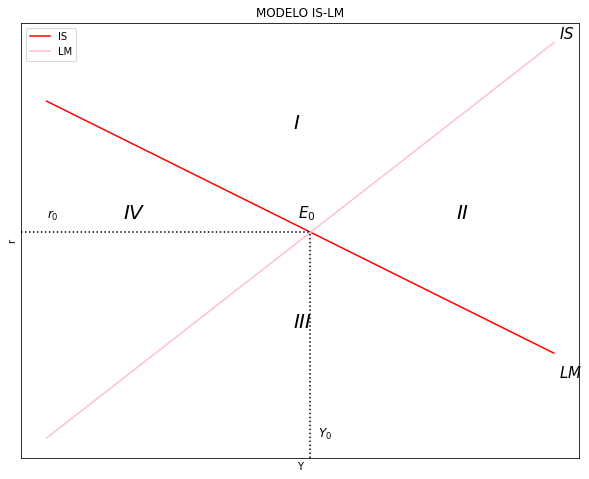

In [5]:
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, r_is, label = "IS", color = "RED")
ax.plot(Y, r_lm, label="LM", color = "PINK")

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")

plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

plt.text(49,100, '$E_0$', fontsize = 15, color = 'BLACK')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'BLACK')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'BLACK')

plt.text(100,20, '$LM$', fontsize = 15, color = 'black')
plt.text(100,190, '$IS$', fontsize = 15, color = 'black')
plt.text(80,100, '$II$', fontsize = 20, color = 'black')
plt.text(15,100, '$IV$', fontsize = 20, color = 'black')
plt.text(48,145, '$I$', fontsize = 20, color = 'black')
plt.text(48,45, '$III$', fontsize = 20, color = 'black')

ax.set(title="MODELO IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

1. Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal $(∆G_0 < 0)$ . El análisis debe ser intuitivo, matemático y gráfico.

Análisi Intuitivo:

    Gasto Fiscal (política fiscal contractiva)

- Mercado de Bienes:
$$ G_0↓ → DA↓ $$
    
$$ DA↓ → DA<Y $$

$$ DA↓ → Y↓ $$

$$ G_0↓ → Y↓ $$

- Mercado de Dinero:

$$ Y↓ → M_d↓ $$

$$ M_d↓ → M_d<M_s $$

$$ M_d↓ → r↓ $$

$$ Y↓ → r↓ $$

Análisis matemático:
- Nivel de producción de equilibrio
$$ Y^e = \frac{j*β_0}{kh + jβ_1} + \frac{h}{kh + jβ_1}\frac{M_o}{P} $$

En ese sentido:

$β_0 = C_0 + I_0 + G_0 + X_0$

$β_1 = 1 - (b - m)(1 - t)$

$$ ∆Y^e = ∆(\frac{j}{kh + jβ_1})∆β_0 $$

$$ ∆Y^e = ∆(\frac{j}{kh + jβ_1})∆G_0 $$
   
$$ ∆Y^e = (+)(-) $$
   
$$ ∆Y^e = (-) $$

$$ ∆Y^e<0 $$




- Tasa de Interés de Equilibrio:

$$ r^e = \frac{kβ_0}{kh + jβ_1} - \frac{β_1}{kh + jβ_1}\frac{M_o}{P} $$

En ese sentido:

$β_0 = C_0 + I_0 + G_0 + X_0$

$β_1 = 1 - (b - m)(1 - t)$

  
$$ ∆r^e = ∆(\frac{k}{kh + jβ_1})∆β_0 $$

$$ ∆r^e = ∆(\frac{k}{kh + jβ_1})∆G_0 $$

$$ ∆r^e = (+)(-) $$

$$ ∆r^e = (-) $$

$$ ∆r^e<0 $$

Text(55, 52, '←')

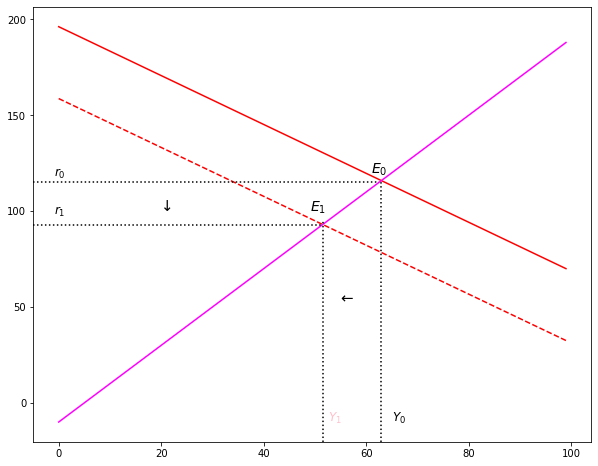

In [8]:
# Análisis Gráfico:

Y_size = 100 

Co = 35
Io = 40
Go = 80
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

Go = 50

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, r, label = "IS_(G_0)", color = "RED")
ax.plot(Y, r_G, label = "IS_(G_1)", color = "RED", linestyle = 'dashed')

ax.plot(Y, i, label="LM", color = "MAGENTA")

plt.axvline(x=51.5,  ymin= 0, ymax= 0.51, linestyle = ":", color = "BLACK")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "BLACK")

plt.axvline(x=63,  ymin= 0, ymax= 0.6, linestyle = ":", color = "BLACK")
plt.axhline(y=115, xmin= 0, xmax= 0.62, linestyle = ":", color = "BLACK")

plt.text(49,100, '$E_1$', fontsize = 14, color = 'BLACK')
plt.text(-1,98, '$r_1$', fontsize = 12, color = 'BLACK')
plt.text(52.5,-10, '$Y_1$', fontsize = 12, color = 'PINK')
plt.text(61,120, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,118, '$r_0$', fontsize = 12, color = 'black')
plt.text(65,-10, '$Y_0$', fontsize = 12, color = 'black')

plt.text(20, 100, '↓', fontsize=15, color='BLACK')
plt.text(55, 52, '←', fontsize=15, color='BLACK')

In [9]:
ax.set(title="Disminución Gasto Fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

2. Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria $(∆M^s<0)$. El análisis debe ser intuitivo, matemático y gráfico.

Análisis Intuitivo:

- Política Monetaria Contractiva

$$ M_s↓ → M^o↓ → M^o < M^d → r↑ $$

$$ M_s↓ → r↑ $$

$$ I = I_0 - hr $$

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

$$ r↑ → Y↓ $$



Análisis matemático:
- Producción de Equilibrio


$$ Y^e = \frac{j*β_0}{kh + jβ_1} + \frac{h}{kh + jβ_1}\frac{M_o}{P} $$

$$ ∆Y^e = ∆(\frac{h}{kh + jβ_1}) ∆(\frac{M_o}{P}) $$


$$ ∆Y^e = (+)\frac{(-)}{(+)} $$

$$ ∆Y^e = (+)(-) $$

$$ ∆Y^e = (-) $$

$$ ∆Y^e<0 $$


- Tasa de Interés de Equilibrio:

$$ r^e = \frac{kβ_0}{kh + jβ_1} - \frac{β_1}{kh + jβ_1}\frac{M_o}{P} $$

$$ ∆r^e = ∆(- \frac{β_1}{kh + jβ_1}\frac{M_o}{P}) $$

$$ ∆r^e = (-)(+)\frac{(-)}{(+)} $$

$$ ∆r^e = (-)(+)(-) $$

$$ ∆r^e = (-)(-) $$

$$ ∆r^e = (+) $$

$$ ∆r^e>0 $$

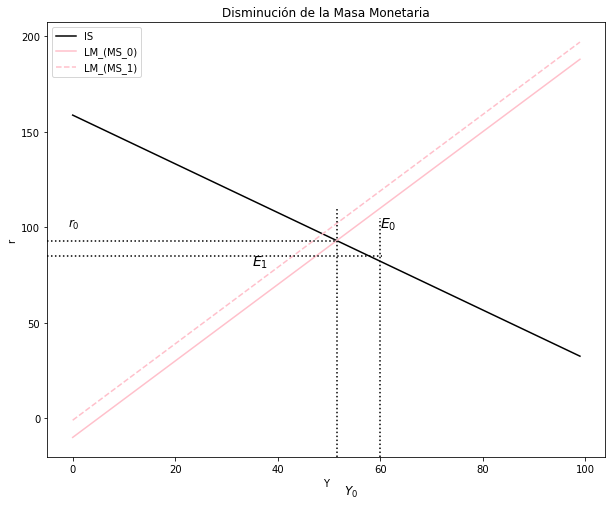

In [10]:
# Análisis Gráfico
Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

Ms = 20

def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, r, label = "IS", color = "black")
ax.plot(Y, i, label="LM_(MS_0)", color = "pink")

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "pink", linestyle = 'dashed')

plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "black")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "black")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "black")
plt.text(35,80, '$E_1$', fontsize = 14, color = 'black')

plt.text(60,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')

ax.set(title="Disminución de la Masa Monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

3. Analice los efectos sobre las variables endógenas Y, r de un incremento de la tasa de impuestos  (∆t > 0). El análisis debe ser intuitivo, matemático y gráfico.

Análisis intuitivo:

- Demanda Agregada:

$$ DA = (C_0 + I_0 + G_0 + X_0 - hr) + (b - m)(1 - t)Y $$

$$ t↑ → DA↓ → DA < Y → Y↓ $$

$$ t↑ → Y↓ $$

$$ Y↓ → M_d↓ $$

$$ M_d < M^s $$

$$ M^s↓ → r↓ $$

Análisis matemático:
- Nivel de producción de equilibrio

$$ \frac{∆Y^e}{∆t} = - \frac{M_shj(b - m)}{P(hk + j(- (1 - t)(b - m) + 1))^2} - \frac{j^2(b - m)(C_0 + G_0 + I_0 + X_0)}{(hk + j(- (1 - t)(b - m) + 1))^2} $$

$ ∆C_0 = ∆G_0 = ∆I_0 = ∆X_0 = ∆h = 0 $

$ ∆M_s = ∆P = ∆k = ∆j = 0 $

$ (hk + j(- (1 - t)(b - m) + 1))^2 > 0 $


siguiendo:

$$ \frac{∆Y^e}{∆t} = - \frac{(+)(+)}{(+)} - \frac{(+)}{(+)} $$

$$ \frac{∆Y^e}{∆t} = -  (+) - (+) $$

$$ \frac{∆Y^e}{(+)} = (-) $$

$$ ∆Y^e = (-) $$

* Tasa de Interés de Equilibrio:

$$ r^e = \frac{kβ_0}{kh + jβ_1} - \frac{β_1}{kh + jβ_1}\frac{M_o}{P} $$

$$ ∆r^e = ∆(\frac{1}{kh + jβ_1}) - ∆(\frac{β_1}{kh + jβ_1}) $$

$$ β_1 = 1 - (b - m)(1 - t) $$

Por lo tanto:

$$ ∆r^e = \frac{(+)}{(+)} - \frac{(+)}{(+)} $$

$$ ∆r^e = (+) (-) (+) $$

$$ ∆r^e = (+)(-) $$

$$ ∆r^e = (-) $$

$$ ∆r^e<0 $$

In [11]:
#Análisis Grafico

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.98

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_is_0 = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_lm_0 = i_LM( k, j, Ms, P, Y)

t = 0.001

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

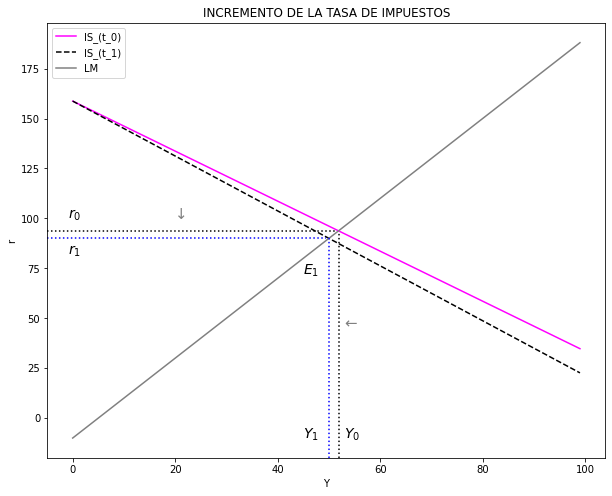

In [12]:
y_max = np.max(i_lm_0)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, r_is_0, label = "IS_(t_0)", color = "MAGENTA")
ax.plot(Y, r_t, label = "IS_(t_1)", color = "BLACK", linestyle = 'dashed')
ax.plot(Y, i_lm_0, label="LM", color = "GREY")

plt.axvline(x=50,  ymin= 0, ymax= 0.51, linestyle = ":", color = "BLUE")
plt.axhline(y=90, xmin= 0, xmax= 0.5, linestyle = ":", color = "BLUE")

plt.axvline(x=52,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
plt.axhline(y=93.5, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

plt.text(-1,100, '$r_0$', fontsize = 14, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 14, color = 'black')
plt.text(45,72, '$E_1$', fontsize = 14, color = 'BLACK')
plt.text(-1,82, '$r_1$', fontsize = 14, color = 'BLACK')
plt.text(45,-10, '$Y_1$', fontsize = 14, color = 'BLACK')

plt.text(20, 100, '↓', fontsize=15, color='grey')
plt.text(53, 45, '←', fontsize=15, color='grey')

ax.set(title="INCREMENTO DE LA TASA DE IMPUESTOS", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

<h1> Código (Tres puntos Extra!)- Revisen el tutorial de clase como guia

* Encuentre las ecuaciones de Ingreso Y_e y tasa de interes r_e de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).

$$  Y=C+I+G  $$

$$  Y=C_0+b*Y^d+I_0-h*r+G_0  $$

$$  Y=C_0+b*(1-t)Y+I_0-h(i-π^e)+G_0  $$

$$  Y*(1-b*(1-t))=C_0+I_0+G_0-h*(r+π^e)  $$



Función de la Curva IS: 

$$  Y=\dfrac{C_0+I_0+G_0}{(1-b*(1-t))}-\dfrac{h*π^e}{(1-b*(1-t))}+\dfrac{h}{1-b*(1-t)}*r  $$



Función de la Curva LM: 
$$ \dfrac{M_0^s}{P_0}=k*Y-j*(r+π^e)  $$
 
$$  \dfrac{M_0^s}{P_0*k}+\dfrac{j*(r+π^e)}{k}=Y  $$

$$  \dfrac{C_0+I_0+G_0}{(1-b*(1-t))}-\dfrac{h*(r+π^e)}{(1-b*(1-t))}=\dfrac{M_0^s}{P_0*k}+\dfrac{j*(r+π^e)}{k}  $$

$$  \dfrac{\beta_0*k}{\\beta_1}-\dfrac{k*h*(r+π^e)}{\beta_1}=\dfrac{M_0^s}{P_0}+\\dfrac{j*(r+π^e)}{1}  $$

$$  \dfrac{\\beta_0*k}{\beta_1}-\dfrac{M_0^s}{P_0}=(r+π^e)*\dfrac{h*k+\beta_1*j}{\beta_1}  $$

$$  \dfrac{\beta_0*k}{h*k+\beta_1*j}-\dfrac{M_0^s*\beta_1}{P_0}-π^e=r^e  $$

En ese sentido:

$$  \dfrac{\beta_0}{h}-\dfrac{Y*\beta_1}{h}-π^e=r  $$

$$  \dfrac{k*Y}{j}-\\dfrac{M_0^s}{P_0*j}-π^e=r  $$

$$  \dfrac{\beta_0}{h}-\dfrac{Y*\beta_1}{h}-π^e=\dfrac{k*Y}{j}-\dfrac{M_0^s}{P_0*j}-π^e  $$

$$ \dfrac{\beta_0*P_0*j+h*M_0^s}{h*P_0*j}=Y*\dfrac{\beta_1*j+h*k}{h*j}  $$
$$  \dfrac{\beta_0*P_0*j+h*M_0^s}{P_0*(\beta_1*j+h*k)}=Y^e  $$

* Grafique el equilibrio simultáneo en los mercados de bienes y de dinero.

C:\Users\Aisha\AppData\Local\Temp\ipykernel_20772\1010021581.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(Y, i_0, "b-", label="LM", color ="pink")
C:\Users\Aisha\AppData\Local\Temp\ipykernel_20772\1010021581.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(Y, i, "r-",label = "IS",color = "magenta")


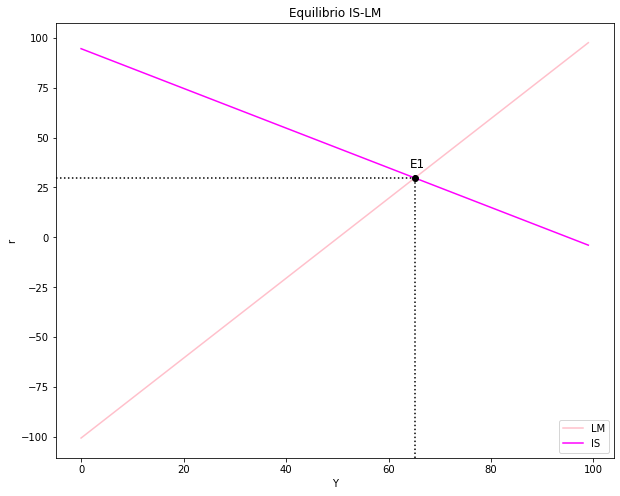

In [13]:
Y_size = 100          
k = 20               
j = 10                
Ms = 20000             
P  = 20
πe = 0.5

Y = np.arange(Y_size)  
def i_LM_0( k, j, Ms, P, πe, Y):
    i_LM = k*Y/j-Ms/(P*j)-πe
    return i_LM
i_0 = i_LM_0( k, j, Ms, P, πe, Y)

Y_size = 100
c = 20                 
b = 0.01                
m = 0.9            
T = 0.4                 
I_bar = 20             
G_bar = 55              
πe = 0.5             
h = 1                  
Y = np.arange(Y_size)  
def i_IS(c, b, m, T, I_bar, G_bar, X_bar, h, Y):
    i_IS = ((c+G_bar+I_bar)/h-Y*((1-b*(1-T)))/h-πe)
    return i_IS
def Y_IS(c, b, m, T, I_bar, G_bar, πe, h, i):
    Y_IS = ((c+I_bar+G_bar)/((1-b*(1-t)))-(h*πe)((1-b*(1-t)))+h/(1-b*(1-t))*i)
    return Y_IS

i = i_IS(c, b, m, T, I_bar, G_bar, πe, h, Y)

y_max = np.max(i_0)

v = [0, Y_size, 0, y_max]                       
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Equilibrio IS-LM", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i_0, "b-", label="LM", color ="pink")
ax.plot(Y, i, "r-",label = "IS",color = "magenta")

plt.axvline(x=65.13,  ymin= 0, ymax= 0.65, linestyle = ":", color = "black") 
plt.axhline(y=29.76, xmin= 0, xmax= 0.65, linestyle = ":", color = "black")   
plt.plot(65.13,29.76, marker="o", color ="black")
plt.text(64.13,34.76, 'E1', fontsize = 12 , color ='black')

ax.legend()
plt.show()